In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
%matplotlib inline

Using TensorFlow backend.


In [2]:
cd data

/home/royal/Downloads/Convolutional_Neural_Networks/Convolutional_Neural_Networks


In [3]:
train_img = sorted(list(paths.list_images('dataset/train')))
valid_img = sorted(list(paths.list_images('dataset/test')))

In [4]:
train_data = []
valid_data = []
train_labels = []
valid_labels = []

In [5]:
for imagePath in train_img:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    train_data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    if label=='cats':
        label=0
        train_labels.append(label)
    elif label=='dogs':
        label=1
        train_labels.append(label)
    else:
        label=2
        train_labels.append(label)

In [6]:
for imagePath in valid_img:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    valid_data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    if label=='cats':
        label=0
        valid_labels.append(label)
    elif label=='dogs':
        label=1
        valid_labels.append(label)
    else:
        label=2
        valid_labels.append(label)

In [7]:
len(train_data),len(valid_data)

(8323, 2058)

In [8]:
len(train_labels),len(valid_labels)

(8323, 2058)

In [9]:
train_data = np.array(train_data,dtype='float32') / 255.0
valid_data = np.array(valid_data,dtype='float32') / 255.0



In [10]:
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Activation

clf= Sequential()

clf.add(Conv2D(32, (5, 5), input_shape = (28, 28, 3), activation = 'relu'))

clf.add(MaxPooling2D(pool_size = (2, 2)))

clf.add(Conv2D(32, (3, 3), activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2, 2)))

clf.add(Conv2D(64, (3, 3), activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2, 2)))

clf.add(Flatten())
clf.add(Dense(500))
clf.add(Activation("relu"))

clf.add(Dense(3))
clf.add(Activation("sigmoid"))
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [13]:
train_labels=to_categorical(train_labels, num_classes=3)
valid_labels=to_categorical(valid_labels, num_classes=3)

In [106]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

clf.compile(loss="binary_crossentropy", optimizer='adam',
    metrics=["accuracy"])

clf.fit_generator(aug.flow(train_data,train_labels, batch_size=20),
validation_data=(valid_data,valid_labels), steps_per_epoch=(train_data.shape[0])//20,
epochs=30,verbose=1)


Epoch 1/30
416/416 [==============================] - 15s 37ms/step - loss: 0.4386 - acc: 0.7746 - val_loss: 0.4541 - val_acc: 0.7627
Epoch 2/30
416/416 [==============================] - 16s 37ms/step - loss: 0.4400 - acc: 0.7717 - val_loss: 0.4698 - val_acc: 0.7421
Epoch 3/30
416/416 [==============================] - 14s 35ms/step - loss: 0.4339 - acc: 0.7763 - val_loss: 0.4033 - val_acc: 0.8037
Epoch 4/30
416/416 [==============================] - 13s 32ms/step - loss: 0.4304 - acc: 0.7806 - val_loss: 0.4142 - val_acc: 0.7925
Epoch 5/30
416/416 [==============================] - 14s 32ms/step - loss: 0.4266 - acc: 0.7814 - val_loss: 0.4092 - val_acc: 0.7985
Epoch 6/30
416/416 [==============================] - 13s 32ms/step - loss: 0.4281 - acc: 0.7767 - val_loss: 0.4018 - val_acc: 0.8003
Epoch 7/30
416/416 [==============================] - 13s 32ms/step - loss: 0.4270 - acc: 0.7790 - val_loss: 0.4020 - val_acc: 0.8058
Epoch 8/30
416/416 [==============================] - 13s 32ms

In [ ]:
cd test

In [108]:
ls

ca.jpg  cat.jpg  d.jpg  dogg.jpg  r.jpg  rr.jpg  sel.jpg


In [109]:
import imutils


image = cv2.imread('sel.jpg')

orig = image.copy()
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [110]:
(cat, dog,selena)=clf.predict(image)[0]


In [111]:
if ((cat>dog) and (cat>selena)):
    label='cat'
    proba=cat*100[:3]
elif ((dog>cat) and (dog>selena)):
    label='dog'
    proba=dog*100
else:
    label='selena'
    proba=selena*100    

In [112]:
text=label+ ' ' +str(proba)[:5]

In [113]:
output = imutils.resize(orig, width=400)
cv2.putText(output, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.7, (255, 0, 0), 2)


array([[[223, 222, 231],
        [223, 222, 231],
        [223, 222, 231],
        ...,
        [201, 203, 211],
        [201, 203, 211],
        [201, 203, 211]],

       [[223, 222, 231],
        [223, 222, 231],
        [223, 222, 231],
        ...,
        [201, 203, 211],
        [201, 203, 211],
        [201, 203, 211]],

       [[223, 222, 231],
        [223, 222, 231],
        [223, 222, 231],
        ...,
        [201, 203, 211],
        [201, 203, 211],
        [201, 203, 211]],

       ...,

       [[205, 211, 218],
        [205, 211, 218],
        [205, 211, 218],
        ...,
        [187, 188, 198],
        [187, 188, 198],
        [187, 188, 198]],

       [[205, 211, 218],
        [205, 211, 218],
        [205, 211, 218],
        ...,
        [187, 188, 198],
        [187, 188, 198],
        [187, 188, 198]],

       [[205, 211, 218],
        [205, 211, 218],
        [205, 211, 218],
        ...,
        [187, 188, 198],
        [187, 188, 198],
        [187, 188, 198]]

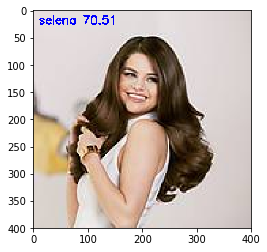

In [114]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [115]:
image = cv2.imread('ca.jpg')

orig = image.copy()
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [116]:
(cat, dog,selena)=clf.predict(image)[0]

In [118]:
if ((cat>dog) and (cat>selena)):
    label='cat'
    proba=cat*100
elif ((dog>cat) and (dog>selena)):
    label='dog'
    proba=dog*100
else:
    label='selena'
    proba=selena*100    

In [119]:
text=label+ ' ' +str(proba)[:5]

In [120]:
output = imutils.resize(orig, width=400)
cv2.putText(output, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.7, (255, 0, 0), 2)


array([[[185, 169, 152],
        [185, 169, 152],
        [185, 169, 152],
        ...,
        [ 69,  82,  78],
        [ 68,  82,  78],
        [ 73,  87,  83]],

       [[183, 167, 150],
        [184, 168, 151],
        [186, 170, 153],
        ...,
        [ 69,  81,  78],
        [ 68,  82,  78],
        [ 71,  85,  81]],

       [[185, 169, 152],
        [185, 169, 152],
        [186, 170, 153],
        ...,
        [ 68,  80,  77],
        [ 64,  78,  74],
        [ 65,  79,  75]],

       ...,

       [[254, 250, 236],
        [255, 252, 237],
        [255, 254, 239],
        ...,
        [ 61,  73,  75],
        [ 61,  73,  75],
        [ 62,  74,  76]],

       [[255, 251, 239],
        [255, 252, 238],
        [253, 252, 236],
        ...,
        [ 61,  73,  75],
        [ 63,  75,  77],
        [ 67,  79,  81]],

       [[255, 249, 238],
        [255, 249, 236],
        [252, 250, 235],
        ...,
        [ 59,  71,  73],
        [ 60,  72,  74],
        [ 64,  76,  78]]

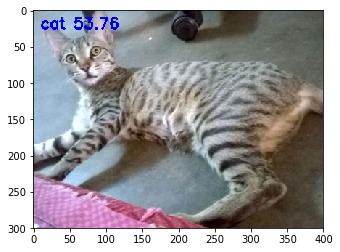

In [121]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [123]:
image = cv2.imread('dogg.jpg')

orig = image.copy()
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [124]:
(cat, dog,selena)=clf.predict(image)[0]

In [125]:
if ((cat>dog) and (cat>selena)):
    label='cat'
    proba=cat*100[:3]
elif ((dog>cat) and (dog>selena)):
    label='dog'
    proba=dog*100
else:
    label='selena'
    proba=selena*100    

In [126]:
text=label+ ' ' +str(proba)[:5]

In [127]:
output = imutils.resize(orig, width=400)
cv2.putText(output, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255), 2)


array([[[  7,  60,  56],
        [  7,  60,  57],
        [  8,  61,  58],
        ...,
        [ 77, 148, 138],
        [ 77, 148, 138],
        [ 77, 148, 138]],

       [[  7,  58,  54],
        [  7,  58,  54],
        [  8,  58,  55],
        ...,
        [ 77, 148, 138],
        [ 77, 148, 138],
        [ 76, 147, 137]],

       [[  6,  57,  52],
        [  6,  57,  52],
        [  7,  57,  53],
        ...,
        [ 78, 149, 139],
        [ 77, 148, 138],
        [ 77, 148, 138]],

       ...,

       [[ 14,  61,  58],
        [ 14,  60,  56],
        [ 14,  59,  54],
        ...,
        [178, 206, 234],
        [172, 201, 233],
        [163, 193, 227]],

       [[ 14,  61,  58],
        [ 14,  61,  58],
        [ 14,  60,  55],
        ...,
        [175, 203, 233],
        [173, 201, 232],
        [170, 199, 230]],

       [[ 15,  62,  59],
        [ 15,  61,  58],
        [ 15,  60,  56],
        ...,
        [172, 202, 234],
        [173, 201, 231],
        [174, 200, 229]]

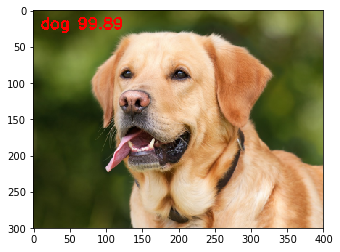

In [128]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))